<a href="https://colab.research.google.com/github/GoryachevDaniil/42_CPP/blob/main/Alabuga.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Task 1

**введение**

В базу данных записываются  события(event) в формате - json. Может быть два типа событий «start*»* и «end*»*. Когда
оба события получены, сессия считается  завершенной «complete*»*. *Player_id* представляет собой
уникального конечного пользователя, который может создать одну или несколько уникальных сессий (*session_id*) на протяжении всего геймплея:

*{
"event": "start",
"country": "FI",
"player_id": "0a2d12a1a7e145de8bae44c0c6e06629",
"session_id": "4a0c43c9-c43a-42ff-ba55-67563dfa35d4",
"ts": "2016-12-02T12:48:05.520022"*

*},
{*

*"event": "end",
"player_id": "0a2d12a1a7e145de8bae44c0c6e06629",
"session_id": "4a0c43c9-c43a-42ff-ba55-67563dfa35d4",
"ts": "2016-12-02T12:49:05.520022"*

*}*

● Сколько сеансов в наборе данных?

● Сколько сеансов завершается в каждой стране? Выведите 10 лучших результатов, отсортированных по
количеству (DESC) и стране (ASC).

● Сколько сессий завершает каждый игрок? Выведите 10 лучших результатов, отсортированных по
count(DESC) и player_id(ASC).

● В какой стране в 2016 году было начато наибольшее количество сеансов?

● График завершенных сеансов  по странам. График 10 лучших результатов, отсортированных по
количеству (DESC) и стране (ASC).

In [1]:
# Импортируем необходимые для работы с данными библиотеки

import pandas as pd
import numpy as np

%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize' : (9, 6)})

from datetime import datetime

In [2]:
# Импортируем необходимые для работы с данными библиотеки

import sys
import timeit

In [3]:
# Подключаем google drive для работы с файлами 

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:
# Считываем файл excel

start_time = timeit.default_timer()
df_test = pd.read_excel('/content/gdrive/MyDrive/Alabuga/data_xlsx.xlsx')
xlsx_reading_time = timeit.default_timer() - start_time
print(f'{xlsx_reading_time} sec.')

175.24668849599948 sec.


In [5]:
# Считываем файл csv

start_time = timeit.default_timer()
df = pd.read_csv('/content/gdrive/MyDrive/Alabuga/data_csv.csv')
csv_reading_time = timeit.default_timer() - start_time
print(f'{csv_reading_time} sec.')

2.5683803939991776 sec.


In [6]:
# Разница в скорости чтения файлов csv и xlsx

xlsx_reading_time - csv_reading_time

172.6783081020003

In [7]:
df.head(3) # Данные считанного файла

,Unnamed: 0,player_id,country,event,session_id,ts
0,0,d6313e1fb7d247a6a034e2aadc30ab3f,PK,start,674606b1-2270-4285-928f-eef4a6b90a60,2016-11-22T20:40:50
1,1,20ac16ebb30a477087c3c7501b1fce73,NaN,end,16ca9d01-d240-4527-9f8f-00ef6cddb1d4,2016-11-18T06:24:50
2,2,318e22b061b54042b880c365c28982d0,NaN,end,5f933591-8cd5-4147-8736-d6237bef5891,2016-11-16T18:01:37


In [8]:
df.info() # Данные считанного файла

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001169 entries, 0 to 1001168
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Unnamed: 0  1001169 non-null  int64 
 1   player_id   1001169 non-null  object
 2   country     498214 non-null   object
 3   event       1001169 non-null  object
 4   session_id  1001169 non-null  object
 5   ts          1001169 non-null  object
dtypes: int64(1), object(5)
memory usage: 45.8+ MB


In [9]:
df.describe() # Данные считанного файла

,Unnamed: 0
count,1.001169e+06
mean,5.005840e+05
std,2.890127e+05
min,0.000000e+00
25%,2.502920e+05
50%,5.005840e+05
75%,7.508760e+05
max,1.001168e+06


In [10]:
df_sort = df.sort_values(by='ts', ignore_index = True) # сортируем данные по времени исследовния

In [11]:
df_sort.head(3)

,Unnamed: 0,player_id,country,event,session_id,ts
0,472016,03c648a9437d401b8e326cd1f93bd06e,NaN,end,cd0f2f42-3ab2-4506-bbf7-00f58909b9ef,2016-10-20T23:40:38
1,596529,f31432131e56427d8b75338a2b4f8048,IQ,start,d2063b29-2a82-49b3-9642-93d52f3198df,2016-11-02T14:35:53
2,603549,aba0274a926a4ccdb94876c8e4dcb0c6,MF,start,7ff15b72-a2a3-4abb-8c3e-354034168d07,2016-11-02T14:35:59


In [12]:
# Делим данные на 2 фрейма по типу события(start и end) 

# Датафрейм c событиями типа 'start'
df_res = df_sort[df_sort['event'] == 'start'].copy()
df_res.rename(columns = {'ts' : 'session_start_time'}, inplace = True)

# Датафрейм c событиями типа 'end'
tmp = df_sort[df_sort['event'] == 'end'].copy()
tmp.rename(columns = {'ts' : 'session_end_time'}, inplace = True)

# Удаляем ненужные фичи из датафрейма c событиями типа 'end'
tmp.drop(columns=['country'], inplace=True)

In [13]:
df_res.head(3)

,Unnamed: 0,player_id,country,event,session_id,session_start_time
1,596529,f31432131e56427d8b75338a2b4f8048,IQ,start,d2063b29-2a82-49b3-9642-93d52f3198df,2016-11-02T14:35:53
2,603549,aba0274a926a4ccdb94876c8e4dcb0c6,MF,start,7ff15b72-a2a3-4abb-8c3e-354034168d07,2016-11-02T14:35:59
3,710240,adc13c0804874368bd8660cdad928042,SX,start,a5d5f69d-cf2c-4963-af15-a06ada66bcd9,2016-11-02T14:36:01


In [14]:
tmp.head(3)

,Unnamed: 0,player_id,event,session_id,session_end_time
0,472016,03c648a9437d401b8e326cd1f93bd06e,end,cd0f2f42-3ab2-4506-bbf7-00f58909b9ef,2016-10-20T23:40:38
59,319282,6c1f82e0816e46e1806e7ee327ac0fd2,end,fdc59077-ac71-4bdf-a2a2-a43dad3d4336,2016-11-02T14:40:57
77,669614,65f80218ab4f4a0c9aca643d90f7713b,end,4b0f35c9-3ff2-488b-bbc2-cd6c00c4b0f7,2016-11-02T14:42:14


In [15]:
# В данном блоке мы соединяем 2 фрейма используя 'session_id' как уникальный ключ

df_res = df_res.merge(tmp, on='session_id', how='outer')

df_res['player_id_x'] = df_res['player_id_y'].combine_first(df_res['player_id_x'])

df_res.drop('player_id_y', axis=1, inplace=True)

df_res.rename(columns = {'ts' : 'session_end_time', \
                         'player_id_x' : 'player_id'}, inplace = True)

df_res.rename(columns = {'event_x' : 'event_start', \
                         'event_y' : 'event_end'}, inplace = True)

df_res = df_res.reindex(columns=['player_id', 'country', 'session_id', \
                                 'event_start', 'session_start_time', \
                                 'event_end', 'session_end_time'])

df_res['session_start_time'] = pd.to_datetime(df_res['session_start_time'])
df_res['session_end_time'] = pd.to_datetime(df_res['session_end_time'])

df_res['event_start'] = df_res['event_start'] == 'start'
df_res['event_end'] = df_res['event_end'] == 'end'

df_res.head(3)

,player_id,country,session_id,event_start,session_start_time,event_end,session_end_time
0,f31432131e56427d8b75338a2b4f8048,IQ,d2063b29-2a82-49b3-9642-93d52f3198df,True,2016-11-02 14:35:53,True,2016-11-02 15:11:30
1,aba0274a926a4ccdb94876c8e4dcb0c6,MF,7ff15b72-a2a3-4abb-8c3e-354034168d07,True,2016-11-02 14:35:59,True,2016-11-02 15:00:14
2,adc13c0804874368bd8660cdad928042,SX,a5d5f69d-cf2c-4963-af15-a06ada66bcd9,True,2016-11-02 14:36:01,True,2016-11-02 14:45:24


In [16]:
df_res.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500587 entries, 0 to 500586
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   player_id           500587 non-null  object        
 1   country             498214 non-null  object        
 2   session_id          500587 non-null  object        
 3   event_start         500587 non-null  bool          
 4   session_start_time  500584 non-null  datetime64[ns]
 5   event_end           500587 non-null  bool          
 6   session_end_time    500585 non-null  datetime64[ns]
dtypes: bool(2), datetime64[ns](2), object(3)
memory usage: 23.9+ MB


In [17]:
df_res.dtypes

player_id                     object
country                       object
session_id                    object
event_start                     bool
session_start_time    datetime64[ns]
event_end                       bool
session_end_time      datetime64[ns]
dtype: object

In [18]:
# Сравниваем обьем памяти занимаемый входным и обработанным наборами данных

size_of_df = sys.getsizeof(df)
size_of_df_res = sys.getsizeof(df_res)

print(f'Start size: {size_of_df} байта.\nNew size {size_of_df_res} байта.\n')

print(size_of_df / size_of_df_res)

Start size: 372880928 байта.
New size 133602010 байта.

2.790982920092295


In [19]:
# Сравниваем размер входного и обработанного набора данных

len_of_df = len(df)
len_of_df_res = len(df_res)

print(f'Start size: {len_of_df} строк.\nNew size {len_of_df_res} строк.')

print(len_of_df / len_of_df_res)

Start size: 1001169 строк.
New size 500587 строк.
1.9999900117262335


In [20]:
# Замеряем время записи объекта в файл типа csv

start_time = timeit.default_timer()
df_res.to_csv('/content/gdrive/MyDrive/Alabuga/df_res.csv')
csv_writing_time = timeit.default_timer() - start_time

print(f'{csv_writing_time} sec.')

5.191506688999652 sec.


In [21]:
# Замеряем время записи объекта в файл типа xlsx

start_time = timeit.default_timer()
df_res.to_excel('/content/gdrive/MyDrive/Alabuga/df_res.xlsx')
xlsx_writing_time = timeit.default_timer() - start_time

print(f'{xlsx_writing_time} sec.')

160.74656501500067 sec.


In [22]:
# Разница временных затрат записи файлов типа xlsx и csv
xlsx_writing_time / csv_writing_time

30.96337434286824

1. Сколько сеансов в наборе данных?

In [23]:
df_res['session_id'].nunique() 

500587

2. Сколько сеансов завершается в каждой стране? Выведите 10 лучших результатов, отсортированных по
количеству (DESC) и стране (ASC).

In [24]:
df_res.groupby('country', as_index=False).event_start.count() \
                                          .sort_values(by=['event_start', 'country'], ascending=False, ignore_index=True)\
                                          .rename(columns = {'event_start' : 'sessions_count'})\
                                          .head(10)

,country,sessions_count
0,IT,2839
1,SH,2672
2,AZ,2670
3,AT,2655
4,WF,2616
5,VA,2602
6,HU,2584
7,IL,2563
8,RO,2550
9,KR,2535


3. Сколько сессий завершает каждый игрок? Выведите 10 лучших результатов, отсортированных по
count(DESC) и player_id(ASC).

In [25]:
df_res.groupby('player_id', as_index=False).event_start.count() \
                                          .sort_values(by=['event_start', 'player_id'], ascending=False, ignore_index=True)\
                                          .rename(columns = {'event_start' : 'event_count'})\
                                          .head(10)

,player_id,event_count
0,fec6a0b9b7f143d8b45221bcc965dfde,50
1,fec32bc801d4497298d0bd781b9c701d,50
2,fea372b3b016474fa96b62da9c7fade1,50
3,fe9ed795e00a43219bac48977041f62a,50
4,fe67ba34f8ef48edae14218fba8f7ef9,50
5,fe4b6d22080449148b9e0b1b17d72d35,50
6,fe3822c6dd3b4af0b50ac897fa2aa46e,50
7,fdae77dd943947ea8f5b7970c17baf3c,50
8,fd9a7f6f335745fdbe0f13f92000e43e,50
9,fd640311b9ff4d96ba0deb5a3cab25f6,50


4. В какой стране в 2016 году было начато наибольшее количество сеансов?

In [26]:
df_res['Year'] = df_res['session_start_time'].dt.strftime('%Y')

In [27]:
df_res[(df_res['event_start'] == True) & (df_res['Year'] == '2016')].groupby('country', as_index=False) \
                                                                        .session_id.count() \
                                                                        .rename(columns={'session_id' : 'session_id_count' }) \
                                                                        .max()

country               ZW
session_id_count    2839
dtype: object

5. График завершенных сеансов  по странам. Гистограмма 10 лучших результатов, отсортированных по
количеству (DESC) и стране (ASC).

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5056fdd2b0>]],
      dtype=object)

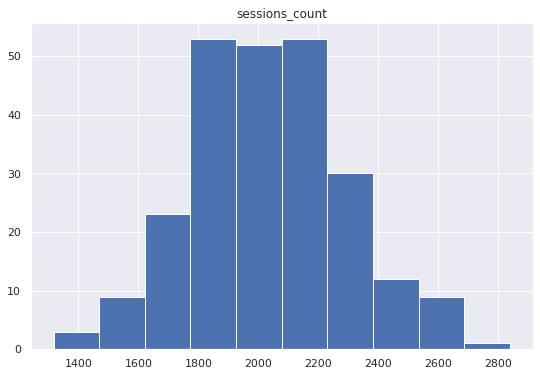

In [28]:
df_res.groupby('country', as_index=False).event_end.count() \
                                          .sort_values(by=['event_end', 'country'], ascending=False, ignore_index=True)\
                                          .rename(columns = {'event_end' : 'sessions_count'})\
                                          .hist()